# Рубежный контроль №1

## Афанасьев А.А. ИУ5-65Б Вариант 1

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [33]:
# Сформируем DataFrame
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['iris species'])

In [34]:
# типы колонок
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
iris species         float64
dtype: object

In [43]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### Проверка на наличие пропусков:

In [42]:
print("Количество отсутствующих значений в датасете Iris:")
iris_df.isnull().sum()

Количество отсутствующих значений в датасете Iris:


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
iris species         0
dtype: int64

### "Парные диаграммы"

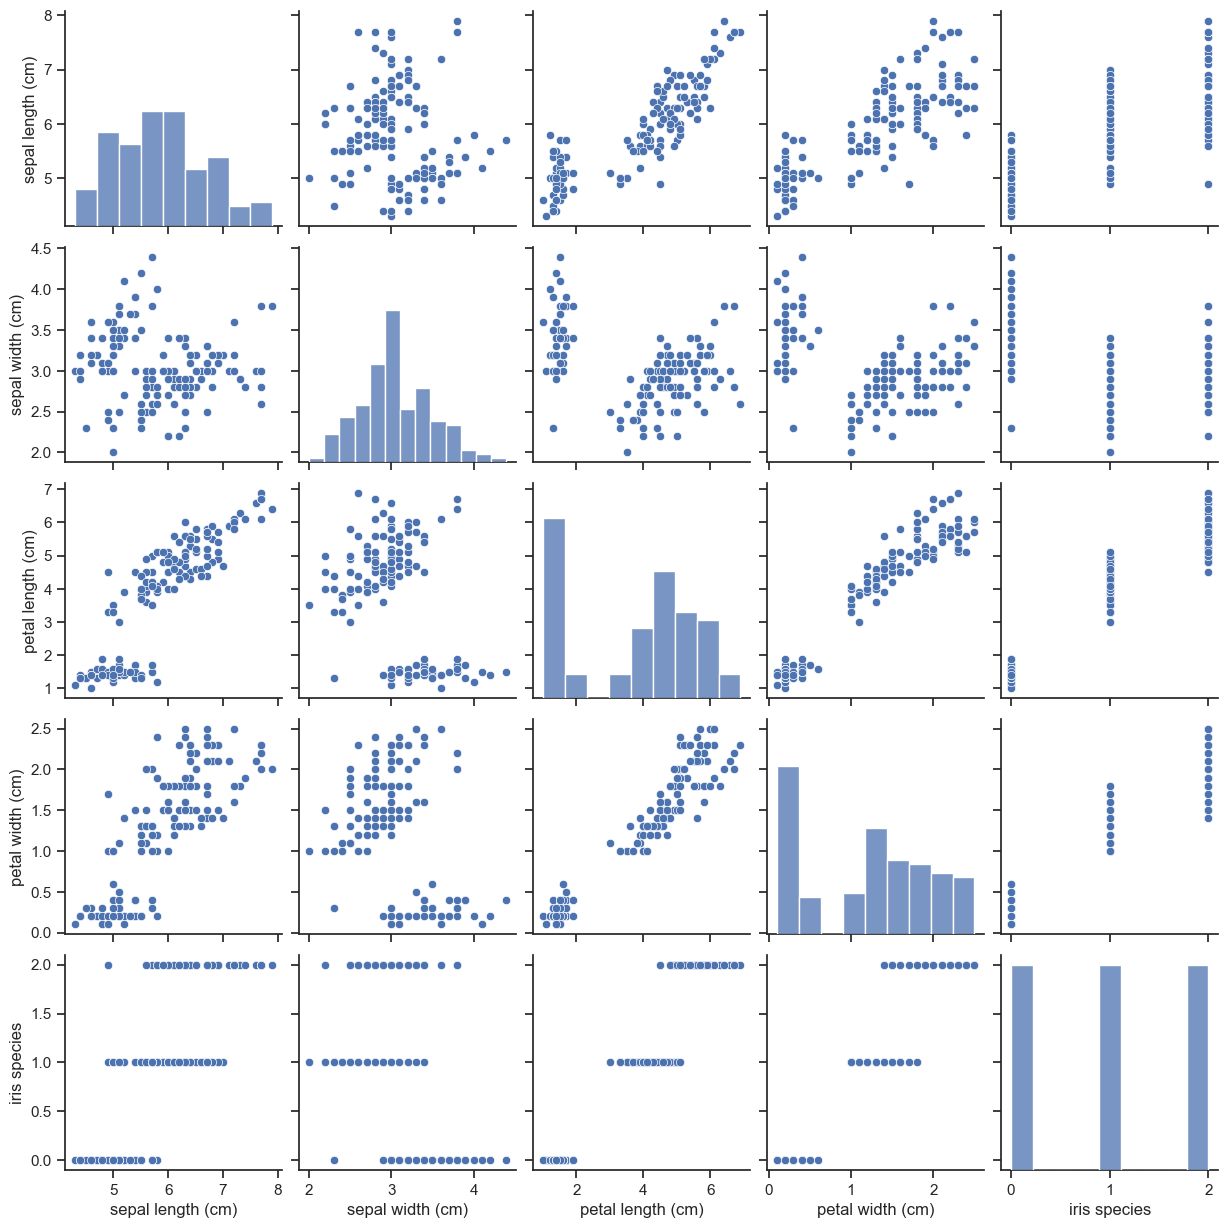

In [37]:
sns.pairplot(iris_df)

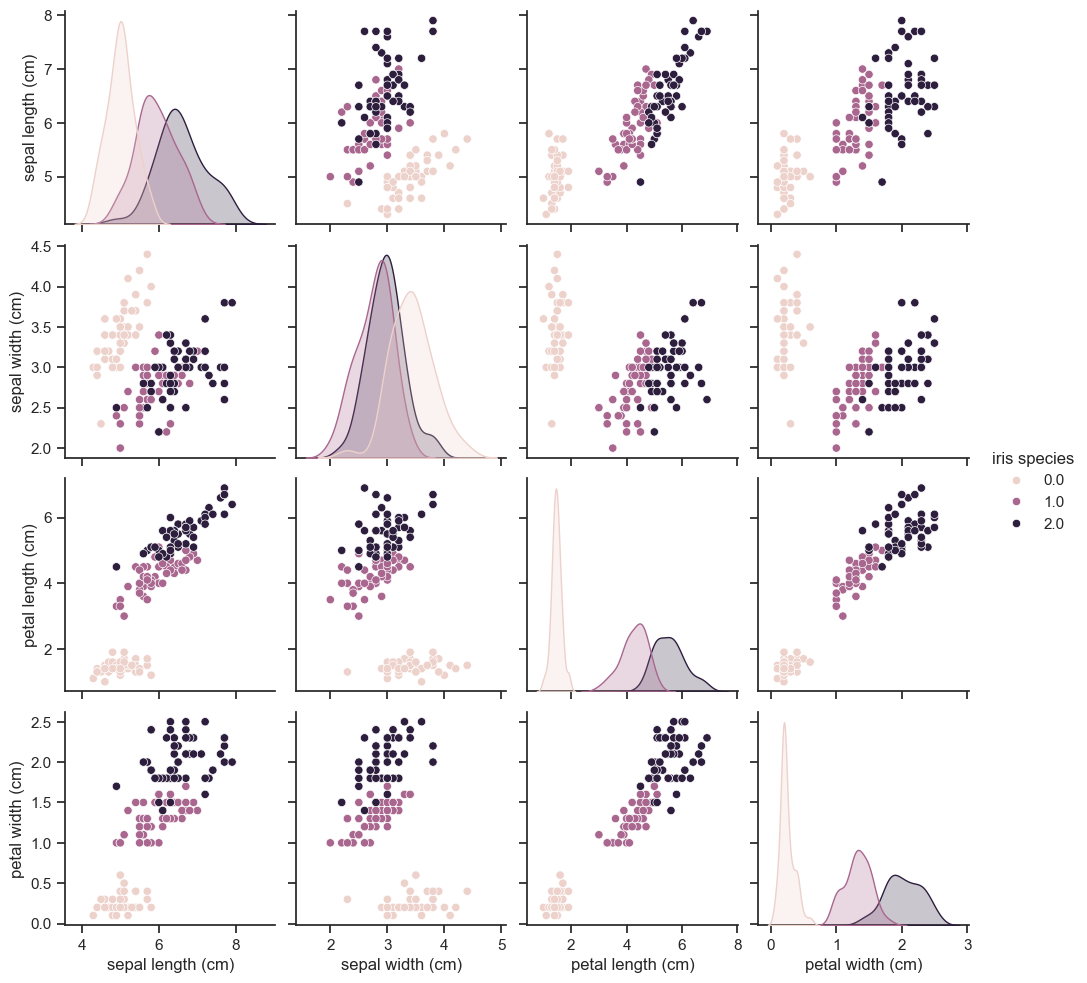

In [39]:
sns.pairplot(iris_df, hue="iris species")

### Корреляционная матрица

In [40]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
iris species,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

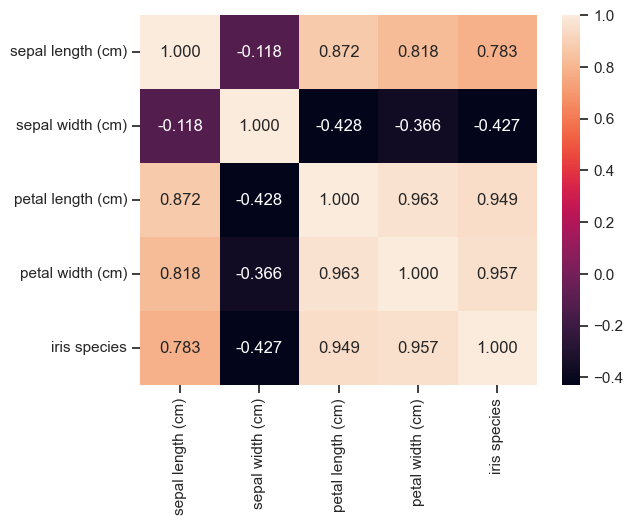

In [41]:
sns.heatmap(iris_df.corr(), annot=True, fmt='.3f')

#### На основании корреляционной матрицы можно сделать следующие выводы:
- Целевой признак сильно коррелирует длиной чашелистика (0.78). Этот признак следует оставить в модели.
- Целевой признак не коррелирует с шириной чашелистика (-0.43). Этот признак следует убрать из модели, так как скорее всего он только ухудшит её качество.
- Длина лепестка очень сильно коррелирует с шириной лепестка (0.96). Следовательно, в модели можно оставить только один из этих признаков. Лучше оставить ширину лепестка, так как он лучше коррелирует с целевым признаком (0.96) и при этом меньше коррелирует с длиной чашелистика (0.82 против 0.87 у длины лепестка).

##### Таким образом, на основании проведённого корреляционного анализа, можно строить модели машинного обучения.
